# Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

2.0.0-alpha0


# Data Preprocessing

11493376/11490434 [==============================] - 0s 0us/step


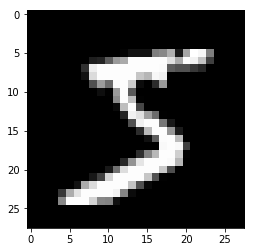

In [2]:
# Load the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train / 255.
X_test = X_test / 255.

# Plot a sample image
plt.imshow(X_train[0], cmap="gray")

### Generate noise dataset

In [ ]:
noise_factor = 0.3

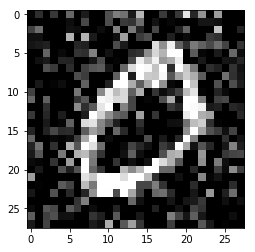

In [4]:
noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_dataset.append(noisy_image)

# Convert to array
noise_dataset = np.array(noise_dataset)

# Plot a sample image
plt.imshow(noise_dataset[1], cmap="gray")

In [ ]:
noise_test_set = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_test_set.append(noisy_image)
    
noise_test_set = np.array(noise_test_set)

# Autoencoder

In [6]:
model = tf.keras.models.Sequential()

# Encoder
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

# Encoded image
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

# Decoder
model.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
model.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr = 0.001))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________
None


# Training

In [7]:
model.fit(noise_dataset.reshape(-1, 28, 28, 1), 
          X_train.reshape(-1, 28, 28, 1), 
          epochs=50, 
          batch_size=200, 
          validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2610 - val_loss: 0.1118
Epoch 2/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1013 - val_loss: 0.0939
Epoch 3/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0926 - val_loss: 0.0899
Epoch 4/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0900 - val_loss: 0.0884
Epoch 5/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0888 - val_loss: 0.0875
Epoch 6/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0881 - val_loss: 0.0869
Epoch 7/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0875 - val_loss: 0.0865
Epoch 8/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0871 - val_loss: 0.0861
Epoch 9/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0867 - val

# De-noised images

In [ ]:
predicted = model.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

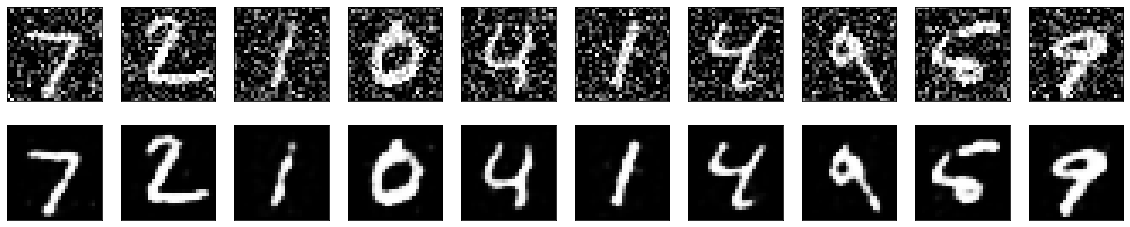

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)